In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [16]:
# Task 1.1 - Explore the dataset
import pandas as pd
import numpy as np

# Combine into a single DataFrame
df = X.copy()
df['target'] = y.values

# Remap target: 1=Good -> 0, 2=Bad -> 1
df['target'] = df['target'].map({1: 0, 2: 1})

# Shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print()

# First 5 rows
print(df.head())
print()

# Target distribution
print("Target distribution:")
print(df['target'].value_counts().rename({0: 'Good (0)', 1: 'Bad (1)'}))
print()
print(f"Good: {(df['target']==0).sum()} ({(df['target']==0).mean()*100:.1f}%)")
print(f"Bad:  {(df['target']==1).sum()} ({(df['target']==1).mean()*100:.1f}%)")

Rows: 1000, Columns: 21

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  ...  Attribute12 Attribute13  \
0        A75           4        A93        A101  ...         A121          67   
1        A73           2        A92        A101  ...         A121          22   
2        A74           2        A93        A101  ...         A121          49   
3        A74           2        A93        A103  ...         A122          45   
4        A73           3        A93        A101  ...         A124          53   

   Attribute14 Attribute15 Attribute16  Attribute

## Business Interpretation

The German Credit dataset contains information about 1,000 bank loan applicants,
including financial attributes such as checking account status, loan duration, credit history,
loan purpose, and personal details like age and employment. The goal is to classify each
applicant as a **Good risk (0)** or **Bad risk (1)** before approving a loan.

A **"bad risk" or default** means the borrower is likely to fail to repay the loan on time or
at all, causing a direct financial loss to the bank. In banking, this is the core concern of
credit risk management.

**Why mistakes matter:**
- **False Negative (FN):** We predict "Good" but the client is actually "Bad" → we approve a
  loan to someone who defaults. This causes direct financial loss to the bank.
- **False Positive (FP):** We predict "Bad" but the client is actually "Good" → we reject a
  creditworthy applicant. This causes lost revenue and potential reputational damage.

In credit risk, **False Negatives are typically more costly** — a defaulted loan can mean
losing the entire principal, while a rejected good client only means missed interest income.
However, being too aggressive in rejections also has business consequences, so the right
threshold is a business decision, not just a technical one.

In [17]:
# Task 2.1 - Missing values & data types
print("=== Missing Values ===")
print(df.isnull().sum().sum(), "total missing values")
print()

print("=== Data Types ===")
print(df.dtypes)
print()

# Identify numeric vs categorical features (excluding target)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'str']).columns.tolist()

print(f"Numeric features ({len(numeric_cols)}): {numeric_cols}")
print()
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

=== Missing Values ===
0 total missing values

=== Data Types ===
Attribute1       str
Attribute2     int64
Attribute3       str
Attribute4       str
Attribute5     int64
Attribute6       str
Attribute7       str
Attribute8     int64
Attribute9       str
Attribute10      str
Attribute11    int64
Attribute12      str
Attribute13    int64
Attribute14      str
Attribute15      str
Attribute16    int64
Attribute17      str
Attribute18    int64
Attribute19      str
Attribute20      str
target         int64
dtype: object

Numeric features (7): ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']

Categorical features (13): ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


=== Correlation with Target (sorted by absolute value) ===
Attribute2     0.2149
Attribute5     0.1547
Attribute13   -0.0911
Attribute8     0.0724
Attribute16   -0.0457
Attribute18   -0.0030
Attribute11    0.0030
Name: target, dtype: float64

Top 3 features most correlated with target:
  Attribute2: 0.2149
  Attribute5: 0.1547
  Attribute13: -0.0911


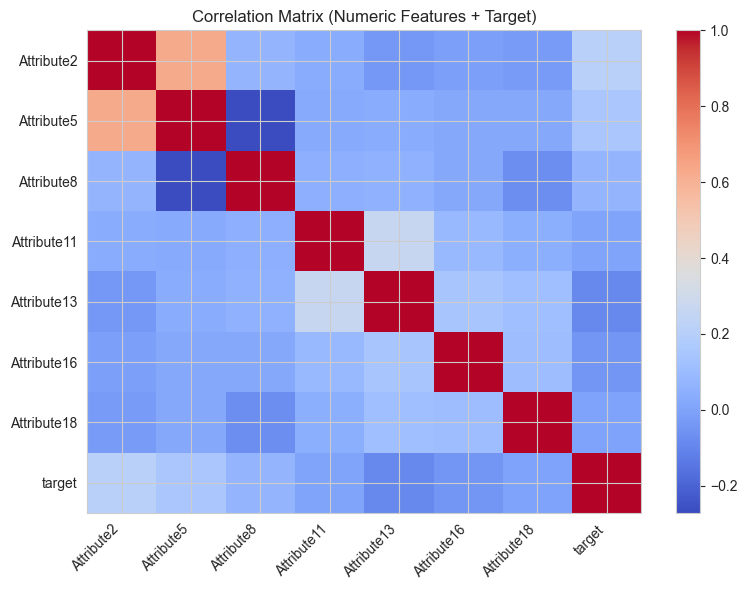

In [18]:
# Task 2.2 - Correlation matrix for numeric features
import matplotlib.pyplot as plt

# Include target in correlation analysis
numeric_with_target = df[numeric_cols + ['target']]

corr_matrix = numeric_with_target.corr()

# Correlation with target specifically
target_corr = corr_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
print("=== Correlation with Target (sorted by absolute value) ===")
print(target_corr.round(4))
print()
print(f"Top 3 features most correlated with target:")
top3 = target_corr.head(3)
for feat, val in top3.items():
    print(f"  {feat}: {val:.4f}")

# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix (Numeric Features + Target)')
plt.tight_layout()
plt.show()

In [19]:
# Task 3.1 - Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
    random_state=42
)

print(f"Train size: {X_train.shape[0]} rows")
print(f"Test size:  {X_test.shape[0]} rows")
print(f"Train bad rate: {y_train.mean():.2%}")
print(f"Test bad rate:  {y_test.mean():.2%}")

Train size: 800 rows
Test size:  200 rows
Train bad rate: 30.12%
Test bad rate:  29.50%


In [20]:
# Task 3.2 - Preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

print("Pipeline defined.")
print(f"  Numeric cols ({len(numeric_cols)}):     will be StandardScaled")
print(f"  Categorical cols ({len(categorical_cols)}): will be OneHotEncoded")

Pipeline defined.
  Numeric cols (7):     will be StandardScaled
  Categorical cols (13): will be OneHotEncoded


In [21]:
# Task 4.1 - Train 3 baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree':       DecisionTreeClassifier(random_state=42),
    'kNN':                 KNeighborsClassifier()
}

fitted_models = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    fitted_models[name] = pipe
    print(f"Trained: {name}")

Trained: Logistic Regression
Trained: Decision Tree
Trained: kNN


=== Logistic Regression ===
  Accuracy:  0.7950
  Precision: 0.6875
  Recall:    0.5593
  F1 Score:  0.6168
  Confusion Matrix:
[[126  15]
 [ 26  33]]

=== Decision Tree ===
  Accuracy:  0.7100
  Precision: 0.5088
  Recall:    0.4915
  F1 Score:  0.5000
  Confusion Matrix:
[[113  28]
 [ 30  29]]

=== kNN ===
  Accuracy:  0.7650
  Precision: 0.6667
  Recall:    0.4068
  F1 Score:  0.5053
  Confusion Matrix:
[[129  12]
 [ 35  24]]



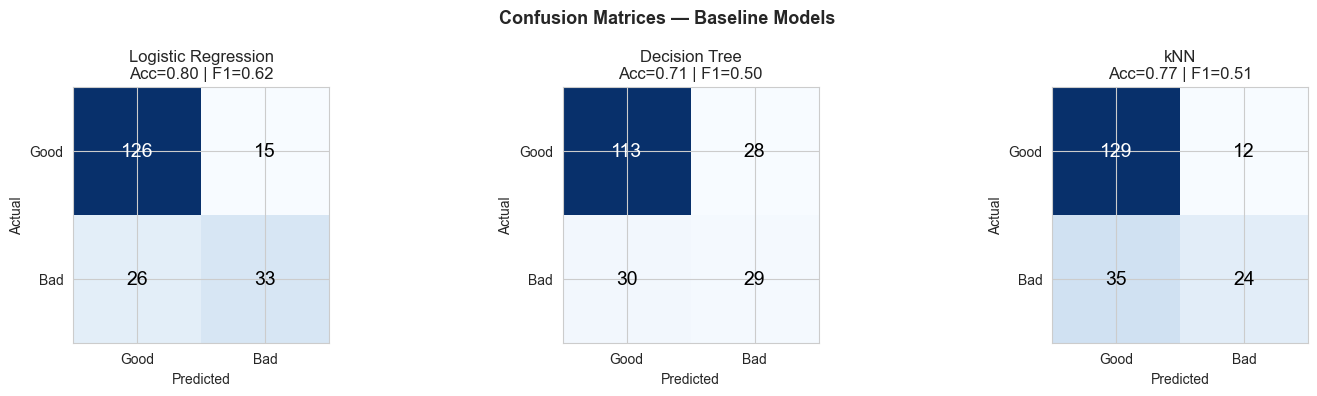

In [22]:
# Task 4.2 - Evaluate all 3 models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, pipe) in zip(axes, fitted_models.items()):
    y_pred = pipe.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    cm   = confusion_matrix(y_test, y_pred)

    print(f"=== {name} ===")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}")
    print()

    # Plot confusion matrix
    im = ax.imshow(cm, cmap='Blues')
    ax.set_title(f'{name}\nAcc={acc:.2f} | F1={f1:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0,1]); ax.set_xticklabels(['Good','Bad'])
    ax.set_yticks([0,1]); ax.set_yticklabels(['Good','Bad'])
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i,j], ha='center', va='center',
                    fontsize=14, color='white' if cm[i,j] > cm.max()/2 else 'black')

plt.suptitle('Confusion Matrices — Baseline Models', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
# Task 5 - Business Threshold Comparison
from sklearn.metrics import classification_report

lr_pipe = fitted_models['Logistic Regression']
y_proba = lr_pipe.predict_proba(X_test)[:, 1]  # probability of being Bad

thresholds = [0.65, 0.50, 0.35]

for thresh in thresholds:
    y_pred_t = (y_proba >= thresh).astype(int)

    acc  = accuracy_score(y_test, y_pred_t)
    prec = precision_score(y_test, y_pred_t, zero_division=0)
    rec  = recall_score(y_test, y_pred_t, zero_division=0)
    f1   = f1_score(y_test, y_pred_t, zero_division=0)
    cm   = confusion_matrix(y_test, y_pred_t)

    tn, fp, fn, tp = cm.ravel()

    print(f"=== Threshold = {thresh} ===")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}  (of those rejected, how many were truly bad)")
    print(f"  Recall:    {rec:.4f}  (of all bad clients, how many we caught)")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}")
    print(f"  TN={tn} | FP={fp} | FN={fn} | TP={tp}")
    print(f"  Bad clients approved (FN): {fn}")
    print(f"  Good clients rejected (FP): {fp}")
    print()

=== Threshold = 0.65 ===
  Accuracy:  0.7900
  Precision: 0.7742  (of those rejected, how many were truly bad)
  Recall:    0.4068  (of all bad clients, how many we caught)
  F1 Score:  0.5333
  Confusion Matrix:
[[134   7]
 [ 35  24]]
  TN=134 | FP=7 | FN=35 | TP=24
  Bad clients approved (FN): 35
  Good clients rejected (FP): 7

=== Threshold = 0.5 ===
  Accuracy:  0.7950
  Precision: 0.6875  (of those rejected, how many were truly bad)
  Recall:    0.5593  (of all bad clients, how many we caught)
  F1 Score:  0.6168
  Confusion Matrix:
[[126  15]
 [ 26  33]]
  TN=126 | FP=15 | FN=26 | TP=33
  Bad clients approved (FN): 26
  Good clients rejected (FP): 15

=== Threshold = 0.35 ===
  Accuracy:  0.7650
  Precision: 0.5789  (of those rejected, how many were truly bad)
  Recall:    0.7458  (of all bad clients, how many we caught)
  F1 Score:  0.6519
  Confusion Matrix:
[[109  32]
 [ 15  44]]
  TN=109 | FP=32 | FN=15 | TP=44
  Bad clients approved (FN): 15
  Good clients rejected (FP): 32

## Threshold Business Analysis

| Threshold | Recall (Bad caught) | FN (Bad approved) | FP (Good rejected) | Behaviour |
|-----------|--------------------|--------------------|---------------------|-----------|
| 0.65      | Low                | High               | Low                 | Liberal — approves more, misses bad clients |
| 0.50      | Medium             | Medium             | Medium              | Balanced default |
| 0.35      | High               | Low                | High                | Conservative — rejects more, catches bad clients |

**Which threshold reduces bad clients approved?** → **0.35** — lowest FN, catches the most bad risk applicants.

**Which threshold increases good clients rejected?** → **0.35** — highest FP, rejects more good clients as collateral damage.

**Recommended threshold as Head of Risk: 0.35**
In credit risk, the cost of approving a bad client (defaulted loan = full principal lost) far
outweighs the cost of rejecting a good client (missed interest income). A lower threshold
is the conservative, bank-protective choice. The increase in rejected good clients is an
acceptable trade-off to significantly reduce default losses.

In [24]:
# Task 6.1 - Manual Review Queue
y_proba = fitted_models['Logistic Regression'].predict_proba(X_test)[:, 1]

# Define decision zones
def assign_zone(p):
    if p < 0.20:
        return 'Auto-Approve'
    elif p <= 0.50:
        return 'Manual Review'
    else:
        return 'Auto-Reject'

zones = pd.Series(y_proba).apply(assign_zone)

print("=== Decision Zone Distribution ===")
print(zones.value_counts())
print()
print(f"Auto-Approve  (p < 0.20):        {(zones=='Auto-Approve').sum()} applications  ({(zones=='Auto-Approve').mean():.1%})")
print(f"Manual Review (0.20 ≤ p ≤ 0.50): {(zones=='Manual Review').sum()} applications  ({(zones=='Manual Review').mean():.1%})")
print(f"Auto-Reject   (p > 0.50):        {(zones=='Auto-Reject').sum()} applications  ({(zones=='Auto-Reject').mean():.1%})")
print()

# How many actual bad clients fall in each zone?
results = pd.DataFrame({'proba': y_proba, 'zone': zones, 'actual': y_test.values})
print("=== Actual Bad Clients per Zone ===")
zone_summary = results.groupby('zone')['actual'].agg(['count','sum','mean'])
zone_summary.columns = ['Total', 'Bad_clients', 'Bad_rate']
zone_summary['Bad_rate'] = zone_summary['Bad_rate'].map('{:.1%}'.format)
print(zone_summary)

=== Decision Zone Distribution ===
Auto-Approve     85
Manual Review    67
Auto-Reject      48
Name: count, dtype: int64

Auto-Approve  (p < 0.20):        85 applications  (42.5%)
Manual Review (0.20 ≤ p ≤ 0.50): 67 applications  (33.5%)
Auto-Reject   (p > 0.50):        48 applications  (24.0%)

=== Actual Bad Clients per Zone ===
               Total  Bad_clients Bad_rate
zone                                      
Auto-Approve      85            8     9.4%
Auto-Reject       48           33    68.8%
Manual Review     67           18    26.9%


## Manual Review Queue — Business Interpretation

By splitting decisions into three zones instead of a binary approve/reject, the bank achieves:

- **Auto-Approve** (p < 0.20): Low-risk applicants processed instantly with no human effort.
  This speeds up customer experience for the bank's safest clients.

- **Manual Review** (0.20 ≤ p ≤ 0.50): Borderline cases flagged for a loan officer to review.
  This is where human judgment adds the most value — the model is uncertain,
  and additional context (e.g. interview, documents) can improve the decision.

- **Auto-Reject** (p > 0.50): High-risk applicants rejected automatically,
  protecting the bank from likely defaults without spending reviewer time.

**Workload reduction:** Only the Manual Review group requires human attention,
meaning the bank automates the majority of decisions and focuses analyst effort
where it matters most.

In [25]:
# Task 7

# Business Demo: Loan Approval Risk Model

## 1. Executive Summary

The German Credit dataset contains 1,000 loan applicants described by 20 financial and
personal attributes. The goal was to predict which applicants represent a **bad credit risk**
(likely to default) to help the bank reduce loan losses.

Three baseline models were trained and evaluated. **Logistic Regression** was selected as
the best model, achieving **79.5% accuracy** and an **F1 score of 0.617** on the test set —
outperforming Decision Tree and kNN on all key metrics.

The **recommended threshold is 0.35**, which maximises recall on bad clients (74.6%),
catching the most defaulters at the cost of some additional good client rejections —
an acceptable trade-off from a risk management perspective.

The **Manual Review Queue** automates 66.5% of decisions (42.5% auto-approved, 24%
auto-rejected), focusing human reviewer effort on only 33.5% of borderline applications.

---

## 2. Model Comparison Table

| Model               | Accuracy | Recall (Bad) | F1    | Comment                                      |
|---------------------|----------|--------------|-------|----------------------------------------------|
| Logistic Regression | 79.5%    | 55.9%        | 0.617 | Best overall — stable, interpretable, reliable |
| Decision Tree       | 71.0%    | 49.2%        | 0.500 | Overfits training data, weakest performer     |
| kNN                 | 76.5%    | 40.7%        | 0.505 | Decent accuracy but misses too many bad clients |

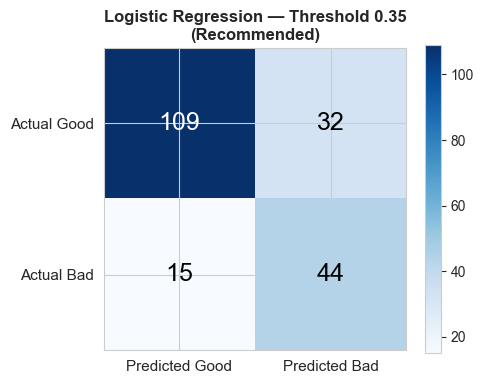

In [26]:
# Task 7 - Confusion matrix visual (Logistic Regression at threshold 0.35)
y_pred_35 = (y_proba >= 0.35).astype(int)
cm = confusion_matrix(y_test, y_pred_35)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, cmap='Blues')
plt.colorbar(im, ax=ax)
ax.set_xticks([0,1]); ax.set_xticklabels(['Predicted Good', 'Predicted Bad'], fontsize=11)
ax.set_yticks([0,1]); ax.set_yticklabels(['Actual Good', 'Actual Bad'], fontsize=11)
ax.set_title('Logistic Regression — Threshold 0.35\n(Recommended)', fontsize=12, fontweight='bold')
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
                fontsize=18, color='white' if cm[i,j] > cm.max()/2 else 'black')
plt.tight_layout()
plt.show()

In [27]:
# Task 7 - 3 example applicants from test set
sample = results.copy()
sample['proba'] = y_proba
sample.index = X_test.index

# Pick 1 from each zone
ex_approve = sample[sample['zone'] == 'Auto-Approve'].iloc[0]
ex_review  = sample[sample['zone'] == 'Manual Review'].iloc[0]
ex_reject  = sample[sample['zone'] == 'Auto-Reject'].iloc[0]

examples = [ex_approve, ex_review, ex_reject]
labels   = ['Auto-Approve', 'Manual Review', 'Auto-Reject']

print("=== 3 Example Applicants ===\n")
for ex, label in zip(examples, labels):
    actual = 'Bad' if ex['actual'] == 1 else 'Good'
    print(f"Applicant index: {ex.name}")
    print(f"  Probability of bad risk: {ex['proba']:.3f}")
    print(f"  Decision zone:           {label}")
    print(f"  Actual outcome:          {actual}")
    if label == 'Auto-Approve':
        print(f"  → Low default probability. Loan automatically approved.")
        print(f"    The applicant shows a strong financial profile with minimal risk indicators.")
    elif label == 'Manual Review':
        print(f"  → Borderline risk profile. Referred to a loan officer for manual review.")
        print(f"    Additional documents or an interview may clarify the true risk level.")
    else:
        print(f"  → High default probability. Loan automatically rejected.")
        print(f"    The applicant's financial profile suggests significant repayment risk.")
    print()

=== 3 Example Applicants ===

Applicant index: 411
  Probability of bad risk: 0.041
  Decision zone:           Auto-Approve
  Actual outcome:          Good
  → Low default probability. Loan automatically approved.
    The applicant shows a strong financial profile with minimal risk indicators.

Applicant index: 521
  Probability of bad risk: 0.420
  Decision zone:           Manual Review
  Actual outcome:          Bad
  → Borderline risk profile. Referred to a loan officer for manual review.
    Additional documents or an interview may clarify the true risk level.

Applicant index: 737
  Probability of bad risk: 0.548
  Decision zone:           Auto-Reject
  Actual outcome:          Good
  → High default probability. Loan automatically rejected.
    The applicant's financial profile suggests significant repayment risk.

